In [61]:
# Necessary packages are impoorted here 
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [62]:
df = pd.read_excel("../DATA/default of credit card clients.xls", skiprows=range(1))
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [63]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

## Data Visualization

In [64]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

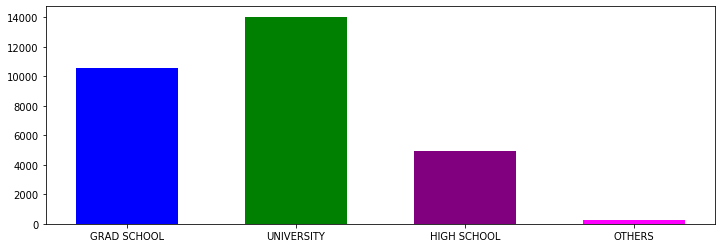

In [65]:
plt.figure(figsize=(12,4))
edu = [[1, 2, 3, 4], ['GRAD SCHOOL', 'UNIVERSITY', 'HIGH SCHOOL', 'OTHERS']]
x_lab = ['GRAD SCHOOL', 'UNIVERSITY', 'HIGH SCHOOL', 'OTHERS']
y = [df['EDUCATION'].value_counts()[1], df['EDUCATION'].value_counts()[2], df['EDUCATION'].value_counts()[3], df['EDUCATION'].value_counts()[5]]
plt.bar(x_lab, y, width=0.6, color=['blue', 'green', 'purple', 'magenta'])
plt.show()


In [66]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

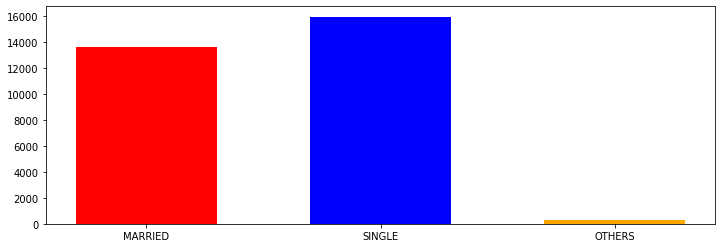

In [67]:
mso = [[1, 2, 3], ['MARRIED', 'SINGLE', 'OTHERS']]
ms = ['MARRIED', 'SINGLE', 'OTHERS']
y = [df['MARRIAGE'].value_counts()[1],df['MARRIAGE'].value_counts()[2], df['MARRIAGE'].value_counts()[3] ]
plt.figure(figsize=(12,4))
plt.bar(ms, y, width=0.6, color=['red', 'blue', 'orange'] )
plt.show()

In [68]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

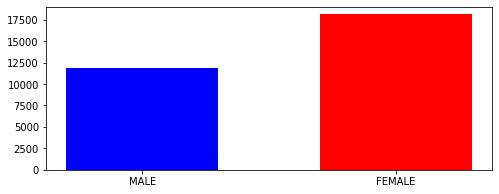

In [69]:
mf = [[1, 2], ['MALE', 'FEMALE']]
mf = ['MALE', 'FEMALE']
y = [df['SEX'].value_counts()[1], df['SEX'].value_counts()[2]]
plt.figure(figsize=(8,3))
plt.bar(mf, y, width=0.6, color=['blue', 'red'] )
plt.show()

## Inferential Statistics (Visualization)

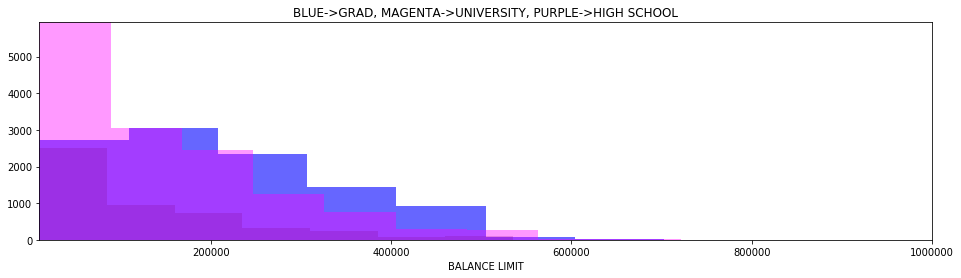

In [70]:
plt.figure(figsize=(16,4))
E = df[df.EDUCATION==1]
E['LIMIT_BAL'].hist(color = 'blue', alpha=0.6)
E = df[df.EDUCATION==2]
E['LIMIT_BAL'].hist(color = 'magenta', alpha=0.4)
E = df[df.EDUCATION==3]
E['LIMIT_BAL'].hist(color = 'purple', alpha=0.2)
plt.autoscale(enable=True, tight=True)
plt.title('BLUE->GRAD, MAGENTA->UNIVERSITY, PURPLE->HIGH SCHOOL')
plt.xlabel('BALANCE LIMIT')
plt.grid()
plt.show()

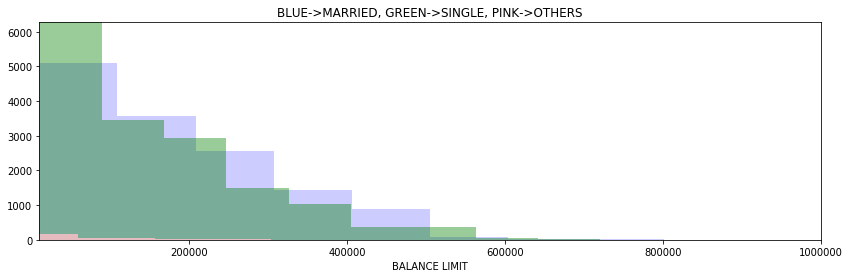

In [71]:
plt.figure(figsize=(14,4))
MS = df[df.MARRIAGE==1]
MS['LIMIT_BAL'].hist(color = 'blue', alpha=0.2)
MS = df[df.MARRIAGE==2]
MS['LIMIT_BAL'].hist(color = 'green', alpha=0.4)
MS = df[df.MARRIAGE==3]
MS['LIMIT_BAL'].hist(color = 'pink', alpha=0.8)
plt.grid()
plt.title('BLUE->MARRIED, GREEN->SINGLE, PINK->OTHERS')
plt.xlabel('BALANCE LIMIT')
plt.autoscale(enable=True, tight=True)
plt.show()

## Hypothesis-testing

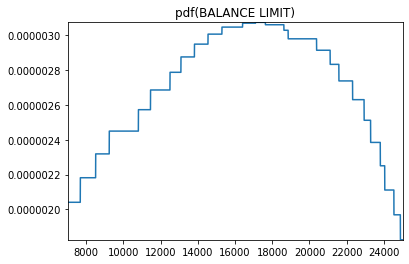

In [72]:
from scipy.stats import norm
bal = np.sort(np.asanyarray(df.LIMIT_BAL))
bal_pdf = norm.pdf(bal, loc=np.mean(bal), scale=np.std(bal))
bal_cdf = norm.cdf(bal, loc=np.mean(bal), scale=np.std(bal))
x_pt = np.arange(1, len(bal_pdf)+1).tolist()


plt.plot(x_pt[7000:25000], (bal_pdf[7000:25000]))
plt.title('pdf(BALANCE LIMIT)')
plt.autoscale(enable=True, tight=True)
plt.show()

In [73]:
from scipy.stats import ttest_ind

df_grad = df[df['EDUCATION']==1]
bal_g = np.sort(df_grad['LIMIT_BAL'])

df_uni = df[df['EDUCATION']==2]
bal_uni = np.sort(df_uni['LIMIT_BAL'])

df_hs = df[df['EDUCATION']==3]
bal_hs = np.sort(df_hs['LIMIT_BAL'])

ttest_ind(bal_g, bal_uni, equal_var = False), ttest_ind(bal_g, bal_hs, equal_var = False), ttest_ind(bal_uni, bal_hs, equal_var = False)

(Ttest_indResult(statistic=39.57867154935797, pvalue=0.0),
 Ttest_indResult(statistic=41.3050193831098, pvalue=0.0),
 Ttest_indResult(statistic=10.692676069537066, pvalue=1.5857820246089056e-26))

In [74]:
PAY = []
for idx in range(6): 
    for j in range(len(df)): # len(df)
        if (df[str(df.columns[idx+11])].iloc[j]) <= (df[str(df.columns[idx+17])].iloc[j]):
            PAY.append(1)
        elif (df[str(df.columns[idx+11])].iloc[j]) < 0.75*(df[str(df.columns[idx+17])].iloc[j]):
            PAY.append(2)
        elif (df[str(df.columns[idx+11])].iloc[j]) < 0.50*(df[str(df.columns[idx+17])].iloc[j]):
            PAY.append(3)
        elif (df[str(df.columns[idx+11])].iloc[j]) < 0.25*(df[str(df.columns[idx+17])].iloc[j]):
            PAY.append(4)
        else:
            PAY.append(5)

In [75]:
payr = np.array(PAY).reshape(6, len(df))
payr[:,0:10]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 1],
       [5, 5, 5, 5, 1, 5, 5, 1, 5, 1],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 1],
       [1, 5, 5, 5, 5, 5, 5, 1, 5, 1],
       [1, 5, 5, 5, 5, 5, 5, 1, 5, 5]])

In [76]:
col = ['PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3', 'PAY-FE-4', 'PAY-FE-5', 'PAY-FE-6']
for idx in range(6):
    df[col[idx]] = payr[idx,:]

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,PAY-FE-1,PAY-FE-2,PAY-FE-3,PAY-FE-4,PAY-FE-5,PAY-FE-6
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,1,5,5,5,1,1
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,1,5,5,5,5,5
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,1,5,5,5,5,5
3,4,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,1,5,5,5,5,5
4,5,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,1,5,1,5,5,5


In [77]:
df['default-payment'] = df['default payment next month']

In [78]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT5,PAY_AMT6,default payment next month,PAY-FE-1,PAY-FE-2,PAY-FE-3,PAY-FE-4,PAY-FE-5,PAY-FE-6,default-payment
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,1,1,5,5,5,1,1,1
1,2,120000,2,2,2,26,-1,2,0,0,...,0,2000,1,1,5,5,5,5,5,1
2,3,90000,2,2,2,34,0,0,0,0,...,1000,5000,0,1,5,5,5,5,5,0
3,4,50000,2,2,1,37,0,0,0,0,...,1069,1000,0,1,5,5,5,5,5,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,689,679,0,1,5,1,5,5,5,0


In [79]:
df['PAY-FE-1'].value_counts()

1    29340
5      624
4       23
3       13
Name: PAY-FE-1, dtype: int64

In [80]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3',
       'PAY-FE-4', 'PAY-FE-5', 'PAY-FE-6', 'default-payment'],
      dtype='object')

In [81]:
x_tr, x_t, y_tr, y_t = train_test_split( df[['PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3', 'PAY-FE-4',
       'PAY-FE-5', 'PAY-FE-6']].values, (df['default payment next month']==1).values, test_size=0.18, random_state=42 )
lr = LogisticRegression()
lr.fit(x_tr, y_tr)
y_p = lr.predict(x_t)
print( 'Accuracy score %0.2f' %accuracy_score(y_t, y_p))

Accuracy score 0.78


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
x_tr, x_t, y_tr, y_t = train_test_split( df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3', 'PAY-FE-4',
       'PAY-FE-5', 'PAY-FE-6']].values, (df['default payment next month']==1).values, test_size=0.18, random_state=42 )
lr = LogisticRegression()
lr.fit(x_tr, y_tr)
y_p = lr.predict(x_t)
print( 'Accuracy score %0.2f' %accuracy_score(y_t, y_p))

Accuracy score 0.81


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [83]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=100)
dtc.fit(x_tr, y_tr)
y_p = dtc.predict(x_t)
print(' Accuracy score %0.2f' %accuracy_score(y_t, y_p) )

 Accuracy score 0.80
